In [1]:
import pandas as pd
import numpy as np 

In [2]:
direct_results = pd.read_csv("results_direct.csv")

In [3]:
def print_latex(df: pd.DataFrame):
    df = df[["lag", "downsample_factor", "filter_time", "learning_rate", "batch_size", "r2", "mse"]].copy()
    df["learning_rate"] = df["learning_rate"].map(lambda x: f"{int(x * 10_0000)}")
    df["r2"] = df["r2"].map(lambda x: f"{x:.3f}")
    df["mse"] = df["mse"].map(lambda x: f"{round(x)}")
    df.rename(columns={"lag": "Lag", "downsample_factor": "$q$", "learning_rate": "$\\eta (\\cdot 10^{-5})$", "filter_time": "$T_f$", 
                       "batch_size": "$B$", "r2": "$R^2$", "mse": "\\ac{MSE}"}, inplace=True)
    print(df.to_latex(index=False))

In [4]:
print_latex(direct_results)

\begin{tabular}{rrrlrll}
\toprule
Lag & $q$ & $T_f$ & $\eta (\cdot 10^{-5})$ & $B$ & $R^2$ & \ac{MSE} \\
\midrule
1 & 5 & 20 & 8 & 128 & 0.682 & 474 \\
3 & 1 & 50 & 8 & 128 & 0.780 & 331 \\
3 & 5 & 50 & 8 & 128 & 0.775 & 342 \\
3 & 5 & 20 & 8 & 32 & 0.792 & 319 \\
1 & 5 & 50 & 8 & 128 & 0.668 & 492 \\
3 & 3 & 50 & 8 & 32 & 0.780 & 332 \\
3 & 3 & 20 & 8 & 32 & 0.792 & 320 \\
1 & 3 & 50 & 8 & 32 & 0.670 & 488 \\
1 & 1 & 50 & 8 & 128 & 0.667 & 489 \\
3 & 3 & 20 & 8 & 128 & 0.796 & 313 \\
1 & 1 & 20 & 8 & 128 & 0.684 & 470 \\
1 & 3 & 50 & 8 & 128 & 0.670 & 488 \\
1 & 3 & 20 & 8 & 128 & 0.689 & 463 \\
3 & 1 & 50 & 8 & 32 & 0.779 & 334 \\
5 & 1 & 20 & 8 & 32 & 0.742 & 402 \\
5 & 1 & 20 & 8 & 128 & 0.740 & 406 \\
3 & 5 & 50 & 8 & 32 & 0.777 & 338 \\
3 & 3 & 50 & 8 & 128 & 0.784 & 328 \\
1 & 5 & 20 & 8 & 32 & 0.682 & 475 \\
3 & 1 & 20 & 8 & 32 & 0.797 & 308 \\
3 & 5 & 20 & 8 & 128 & 0.788 & 325 \\
1 & 5 & 50 & 8 & 32 & 0.666 & 494 \\
1 & 3 & 20 & 8 & 32 & 0.685 & 470 \\
1 & 1 & 20 & 8 & 32 & 0

In [5]:
direct_results = direct_results[direct_results["learning_rate"] == 8e-5]

In [6]:
direct_results[direct_results.duplicated(["lag", "filter_time", "learning_rate", "batch_size"])]

,lag,downsample_factor,filter_time,lstm_layers,learning_rate,batch_size,r2_flex_ext,r2_pro_sup,r2,mse
2,3,5,50,"(64, 32)",0.00008,128,0.869941,0.679096,0.774519,342.200378
6,3,3,20,"(64, 32)",0.00008,32,0.890512,0.693522,0.792018,319.771332
8,1,1,50,"(64, 32)",0.00008,128,0.766060,0.568885,0.667472,488.654724
10,1,1,20,"(64, 32)",0.00008,128,0.793242,0.575279,0.684260,470.080872
11,1,3,50,"(64, 32)",0.00008,128,0.776790,0.563858,0.670323,487.925598
12,1,3,20,"(64, 32)",0.00008,128,0.797669,0.580511,0.689089,463.393127
13,3,1,50,"(64, 32)",0.00008,32,0.870294,0.688245,0.779270,334.049347
16,3,5,50,"(64, 32)",0.00008,32,0.870326,0.684268,0.777297,337.504272
17,3,3,50,"(64, 32)",0.00008,128,0.874532,0.693141,0.783837,327.750977
19,3,1,20,"(64, 32)",0.00008,32,0.883313,0.711248,0.797281,307.751221


In [53]:
PARAMETERS = ["lag", "downsample_factor", "filter_time", "batch_size"]

def duplicates(df: pd.DataFrame, key: str): 
    params = PARAMETERS.copy()
    params.remove(key)
    param_df = df[params]
    x = df.groupby(param_df.columns.tolist())
    res = []
    for info, item in x: 
        y = item[[key, "r2"]].to_dict("list")
        res.append(dict(zip(y[key], y["r2"])))
    res = pd.DataFrame(res)
    return res

lag_res = duplicates(direct_results, "filter_time")
lag_res

,20,50
0,0.685426,0.665751
1,0.684260,0.667472
2,0.684655,0.669516
3,0.689089,0.670323
4,0.681654,0.665561
5,0.682089,0.667833
6,0.797281,0.779270
7,0.778701,0.779813
8,0.792018,0.780407
9,0.795639,0.783837


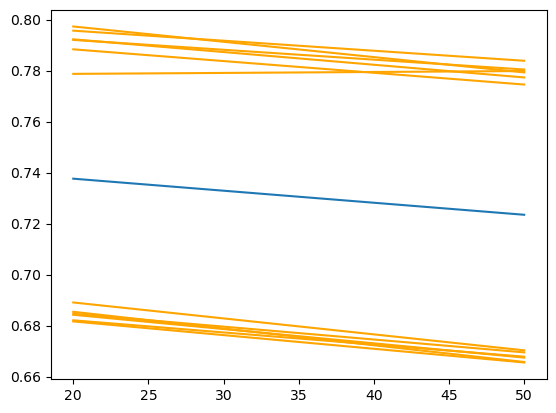

In [54]:
import matplotlib.pyplot as plt 

plt.plot(lag_res.T, c="orange")
plt.plot(lag_res.keys(), lag_res.dropna().values.mean(axis=0))
plt.show()